# <center><font color='#e327a1'> An Analysis of the Six Biggest Companies Listed on Nasdaq (and the S&P 500)</font></center>

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/NASDAQ_Logo.svg/1200px-NASDAQ_Logo.svg.png)

This is a simple notebook utilizing time series data, which is a collection of data that is collected over time intervals. In this notebook, we will be using time series data that is commonly seen, the stock market. Specifically, I am going to explore the data and discover some insights of the six biggest companies listed on the NASDAQ in terms of market cap (being in order: Apple, Microsoft, Alphabet, Amazon, Nvidia, and Tesla) and the S&P 500 ETF, SPY. 

The three main libraries we are going to use in this notebook are:
- yfinance: This allows us to download market data of stocks from Yahoo! Finance.
- matplotlib: Allows us to make very detailed graphs to help us visualize data.
- seaborn: Is an extension of matplotlib which makes it easier to create visualizations.



# <div align='center'>Table of Contents</div>

* [Download the Libraries and Data](#download)
* [Change of Price Over Time](#change)
* [Volume of Sales](#volume)
* [Daily Returns](#returns)
* [Correlation Between Different Stocks](#correlation)
* [Risk of the Stocks](#risk)

### <div id='download'><center>Download the Libraries and Data</center>

In [94]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
google = yf.download('goog', start='2023-01-01', end='2023-07-02')
apple = yf.download('aapl', start='2023-01-01', end='2023-07-02')
microsoft = yf.download('msft', start='2023-01-01', end='2023-07-02')
amazon = yf.download('amzn', start='2023-01-01', end='2023-07-02')
nvidia= yf.download('nvda', start='2023-01-01', end='2023-07-02')
tesla = yf.download('tsla', start='2023-01-01', end='2023-07-02')
spy = yf.download('spy', start='2023-01-01', end='2023-07-02')

spy

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,377.968140,74850700
2023-01-04,383.179993,385.880005,380.000000,383.760010,380.886139,85934100
2023-01-05,381.720001,381.839996,378.760010,379.380005,376.538910,76970500
2023-01-06,382.609985,389.250000,379.410004,388.079987,385.173737,104189600
2023-01-09,390.369995,393.700012,387.670013,387.859985,384.955383,73978100
...,...,...,...,...,...,...
2023-06-26,432.619995,434.609985,431.190002,431.440002,431.440002,72823600
2023-06-27,432.350006,436.809998,431.880005,436.170013,436.170013,72813700
2023-06-28,435.049988,437.440002,434.410004,436.390015,436.390015,75636000


### <div id='change'><center>Change of Price Over Time</center>

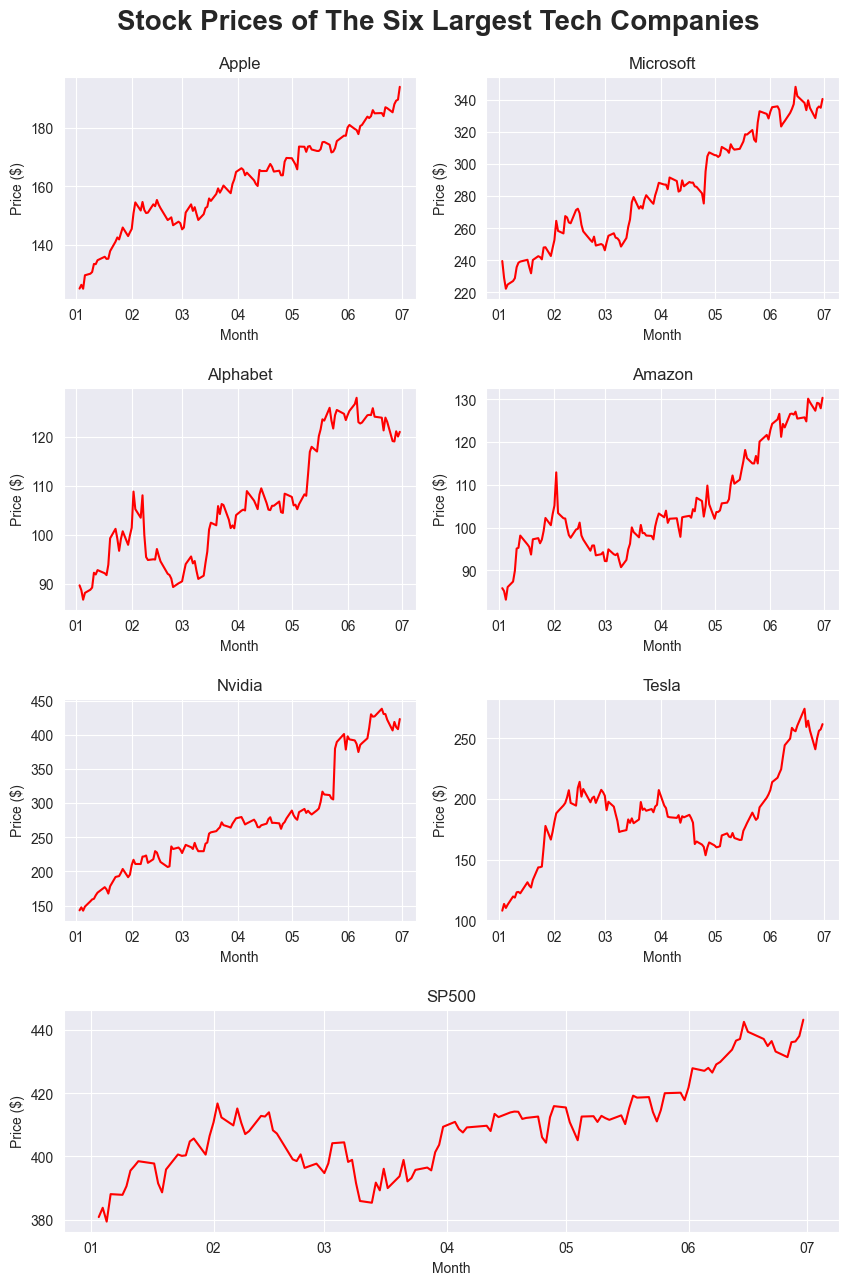

In [96]:
from matplotlib.dates import DateFormatter

sns.set_style('darkgrid')

fig = plt.figure(figsize=(10,15))
fig.tight_layout()

ax1 = plt.subplot2grid(shape=(4,2), loc=(0,0))
ax2 = plt.subplot2grid(shape=(4,2), loc=(0,1))
ax3 = plt.subplot2grid(shape=(4,2), loc=(1,0))
ax4 = plt.subplot2grid(shape=(4,2), loc=(1,1))
ax5 = plt.subplot2grid(shape=(4,2), loc=(2,0))
ax6 = plt.subplot2grid(shape=(4,2), loc=(2,1))
ax7 = plt.subplot2grid(shape=(4,2), loc=(3,0), colspan=2)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.xaxis.set_major_formatter(DateFormatter('%m'))
    ax.set_xlabel('Month')
    ax.set_ylabel('Price ($)')

plt.subplots_adjust(hspace=.4)

fig.suptitle('Stock Prices of The Six Largest Tech Companies', fontsize=20, fontweight='bold', y=.925)

ax1.plot(apple['Close'], color='red')
ax1.title.set_text('Apple')
ax2.plot(microsoft['Close'], color='red')
ax2.title.set_text('Microsoft')
ax3.plot(google['Close'], color='red')
ax3.title.set_text('Alphabet')
ax4.plot(amazon['Close'], color='red')
ax4.title.set_text('Amazon')
ax5.plot(nvidia['Close'], color='red')
ax5.title.set_text('Nvidia')
ax6.plot(tesla['Close'], color='red')
ax6.title.set_text('Tesla')
ax7.plot(spy['Close'], color='red')
ax7.title.set_text('SP500')

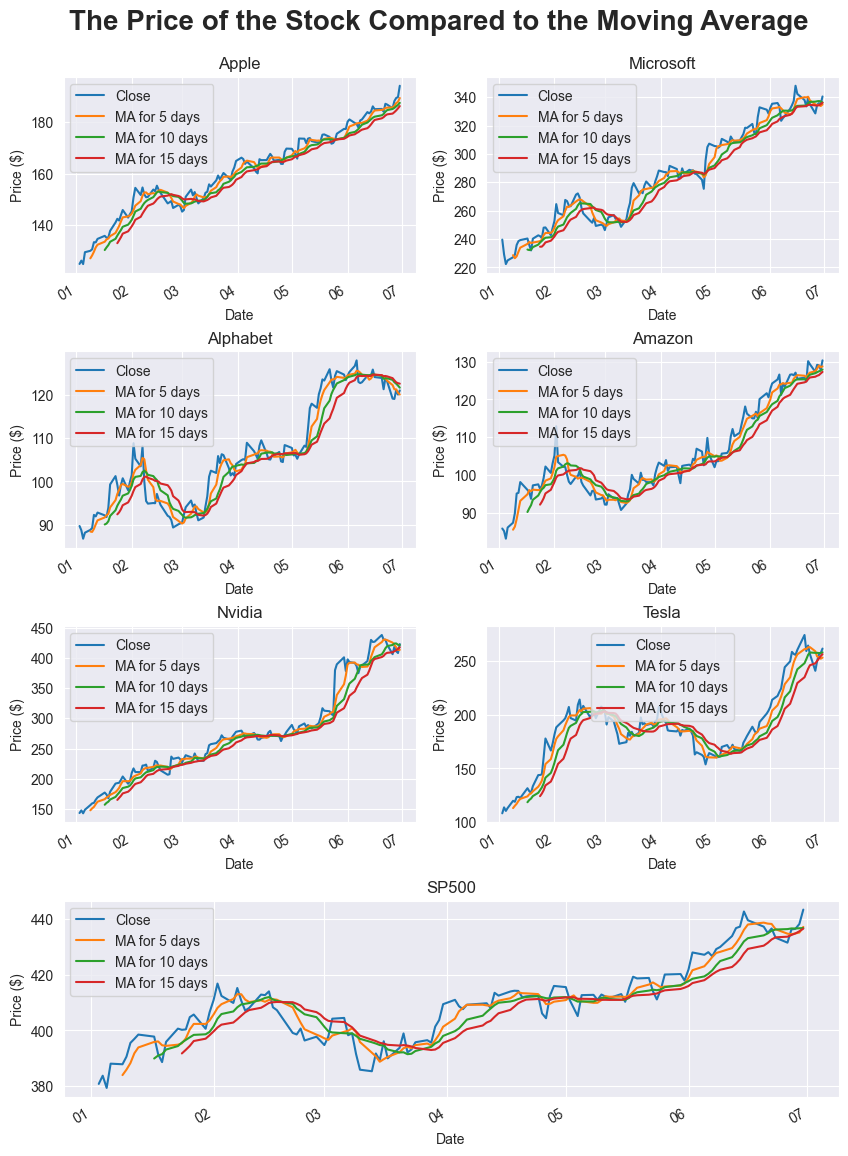

In [97]:
for c in [apple, microsoft, google, amazon, nvidia, tesla, spy]:
    for ma in [5,10,15]:
        cn = f'MA for {ma} days'
        c[cn] = c['Close'].rolling(ma).mean()

fig = plt.figure(figsize=(10,15))
fig.tight_layout()

ax1 = plt.subplot2grid(shape=(4,2), loc=(0,0))
ax2 = plt.subplot2grid(shape=(4,2), loc=(0,1))
ax3 = plt.subplot2grid(shape=(4,2), loc=(1,0))
ax4 = plt.subplot2grid(shape=(4,2), loc=(1,1))
ax5 = plt.subplot2grid(shape=(4,2), loc=(2,0))
ax6 = plt.subplot2grid(shape=(4,2), loc=(2,1))
ax7 = plt.subplot2grid(shape=(4,2), loc=(3,0), colspan=2)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.xaxis.set_major_formatter(DateFormatter('%m'))
    ax.set_xlabel('Month')
    ax.set_ylabel('Price ($)')

plt.subplots_adjust(hspace=.4)

fig.suptitle('The Price of the Stock Compared to the Moving Average', fontsize=20, fontweight='bold', y=.925)

apple[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 15 days']].plot(ax=ax1)
ax1.title.set_text('Apple')
microsoft[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 15 days']].plot(ax=ax2)
ax2.title.set_text('Microsoft')
google[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 15 days']].plot(ax=ax3)
ax3.title.set_text('Alphabet')
amazon[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 15 days']].plot(ax=ax4)
ax4.title.set_text('Amazon')
nvidia[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 15 days']].plot(ax=ax5)
ax5.title.set_text('Nvidia')
tesla[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 15 days']].plot(ax=ax6)
ax6.title.set_text('Tesla')
spy[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 15 days']].plot(ax=ax7)
ax7.title.set_text('SP500')

### <div id='volume'><center>Volume of Sales</center>

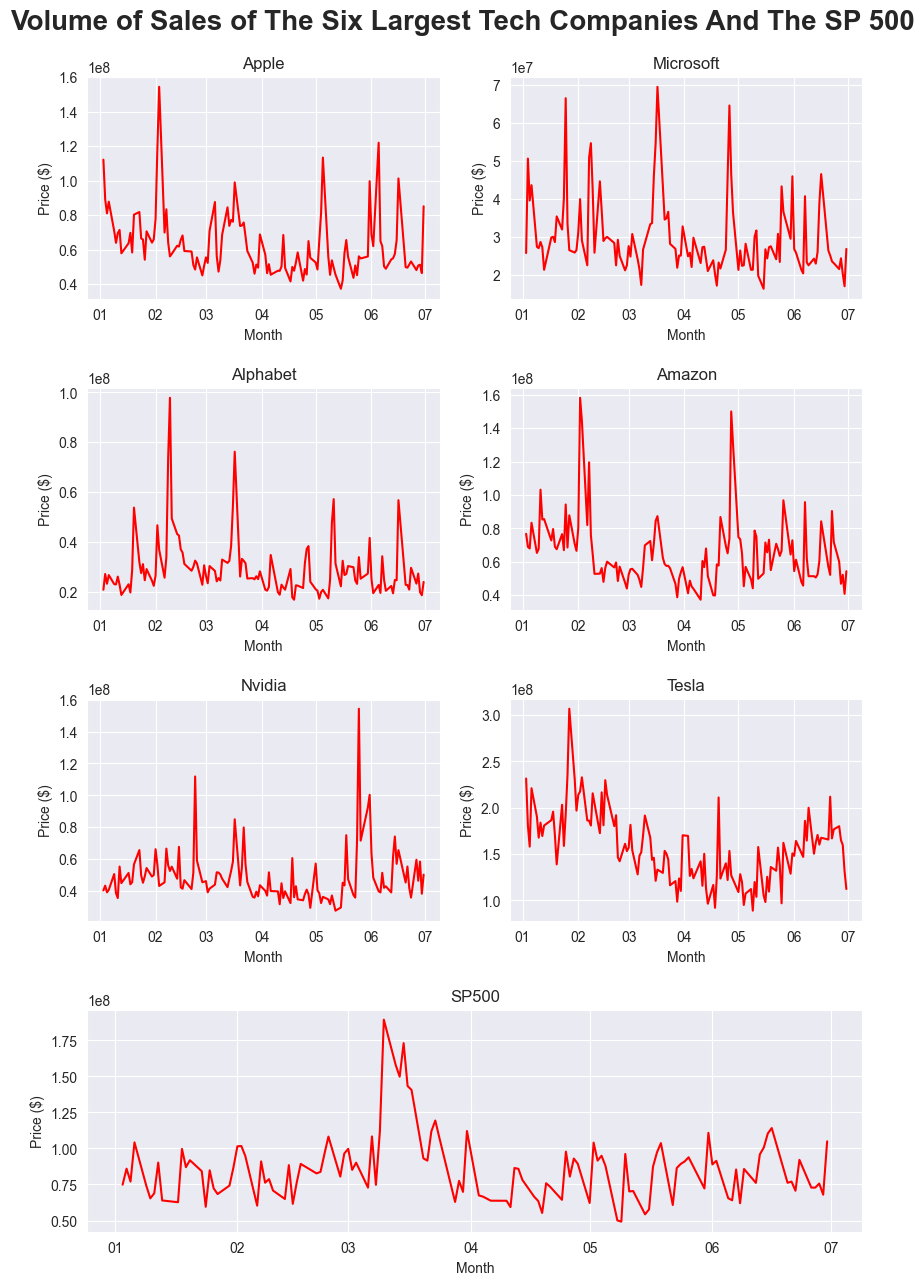

In [98]:
fig = plt.figure(figsize=(10,15))
fig.tight_layout()

ax1 = plt.subplot2grid(shape=(4,2), loc=(0,0))
ax2 = plt.subplot2grid(shape=(4,2), loc=(0,1))
ax3 = plt.subplot2grid(shape=(4,2), loc=(1,0))
ax4 = plt.subplot2grid(shape=(4,2), loc=(1,1))
ax5 = plt.subplot2grid(shape=(4,2), loc=(2,0))
ax6 = plt.subplot2grid(shape=(4,2), loc=(2,1))
ax7 = plt.subplot2grid(shape=(4,2), loc=(3,0), colspan=2)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.xaxis.set_major_formatter(DateFormatter('%m'))
    ax.set_xlabel('Month')
    ax.set_ylabel('Price ($)')

plt.subplots_adjust(hspace=.4)

fig.suptitle('Volume of Sales of The Six Largest Tech Companies And The SP 500', fontsize=20, fontweight='bold', y=.925)

ax1.plot(apple['Volume'], color='red')
ax1.title.set_text('Apple')
ax2.plot(microsoft['Volume'], color='red')
ax2.title.set_text('Microsoft')
ax3.plot(google['Volume'], color='red')
ax3.title.set_text('Alphabet')
ax4.plot(amazon['Volume'], color='red')
ax4.title.set_text('Amazon')
ax5.plot(nvidia['Volume'], color='red')
ax5.title.set_text('Nvidia')
ax6.plot(tesla['Volume'], color='red')
ax6.title.set_text('Tesla')
ax7.plot(spy['Volume'], color='red')
ax7.title.set_text('SP500')

### <div id='returns'><center>Daily Returns</center>

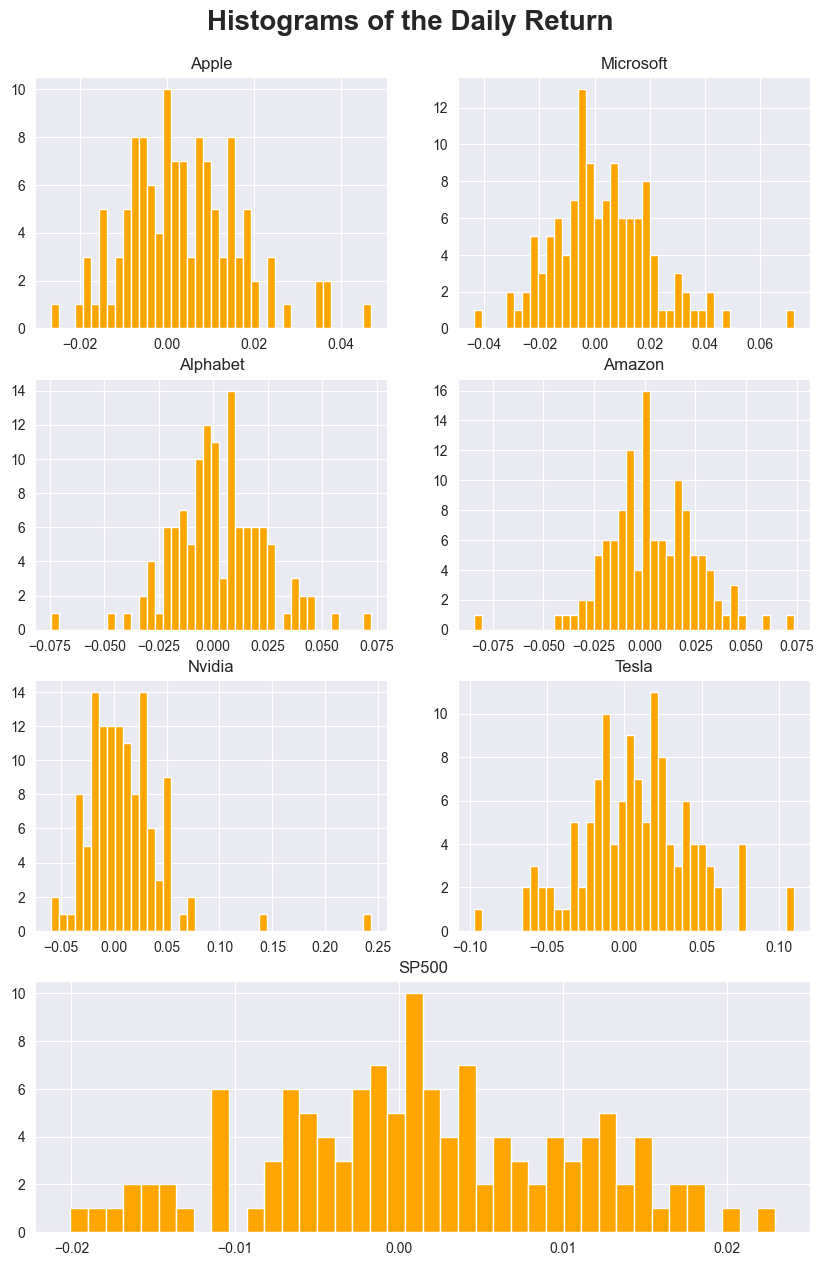

In [99]:
for c in [apple, microsoft, google, amazon, nvidia, tesla, spy]:
    c['Daily Return'] = c['Close'].pct_change()

fig = plt.figure(figsize=(10,15))
fig.tight_layout()

ax1 = plt.subplot2grid(shape=(4,2), loc=(0,0))
ax2 = plt.subplot2grid(shape=(4,2), loc=(0,1))
ax3 = plt.subplot2grid(shape=(4,2), loc=(1,0))
ax4 = plt.subplot2grid(shape=(4,2), loc=(1,1))
ax5 = plt.subplot2grid(shape=(4,2), loc=(2,0))
ax6 = plt.subplot2grid(shape=(4,2), loc=(2,1))
ax7 = plt.subplot2grid(shape=(4,2), loc=(3,0), colspan=2)

plt.subplots_adjust(hspace=.2)

fig.suptitle('Histograms of the Daily Return', fontsize=20, fontweight='bold', y=.925)

apple['Daily Return'].hist(ax=ax1, bins=40, color='orange')
ax1.title.set_text('Apple')
microsoft['Daily Return'].hist(ax=ax2, bins=40, color='orange')
ax2.title.set_text('Microsoft')
google['Daily Return'].hist(ax=ax3, bins=40, color='orange')
ax3.title.set_text('Alphabet')
amazon['Daily Return'].hist(ax=ax4, bins=40, color='orange')
ax4.title.set_text('Amazon')
nvidia['Daily Return'].hist(ax=ax5, bins=40, color='orange')
ax5.title.set_text('Nvidia')
tesla['Daily Return'].hist(ax=ax6, bins=40, color='orange')
ax6.title.set_text('Tesla')
spy['Daily Return'].hist(ax=ax7, bins=40, color='orange')
ax7.title.set_text('SP500')

### <div id='correlation'><center>Correlation Between Different Stocks</center>

In [100]:
cdf = yf.download(['aapl', 'msft', 'goog', 'amzn', 'nvda', 'tsla', 'spy'], start='2023-01-01', end='2023-07-02')['Close']
returns = cdf.pct_change()

returns

[*********************100%***********************]  7 of 7 completed


,AAPL,AMZN,GOOG,MSFT,NVDA,SPY,TSLA
Date,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.010314,-0.007924,-0.011037,-0.043743,0.030318,0.007720,0.051249
2023-01-05,-0.010605,-0.023726,-0.021869,-0.029638,-0.032816,-0.011413,-0.029039
2023-01-06,0.036794,0.035611,0.016019,0.011785,0.041640,0.022932,0.024651
2023-01-09,0.004089,0.014870,0.007260,0.009736,0.051753,-0.000567,0.059349
...,...,...,...,...,...,...,...
2023-06-26,-0.007553,-0.015464,-0.031946,-0.019163,-0.037362,-0.004086,-0.060600
2023-06-27,0.015059,0.014529,-0.000672,0.018168,0.030616,0.010963,0.038000
2023-06-28,0.006328,-0.001084,0.017393,0.003826,-0.018125,0.000504,0.024100


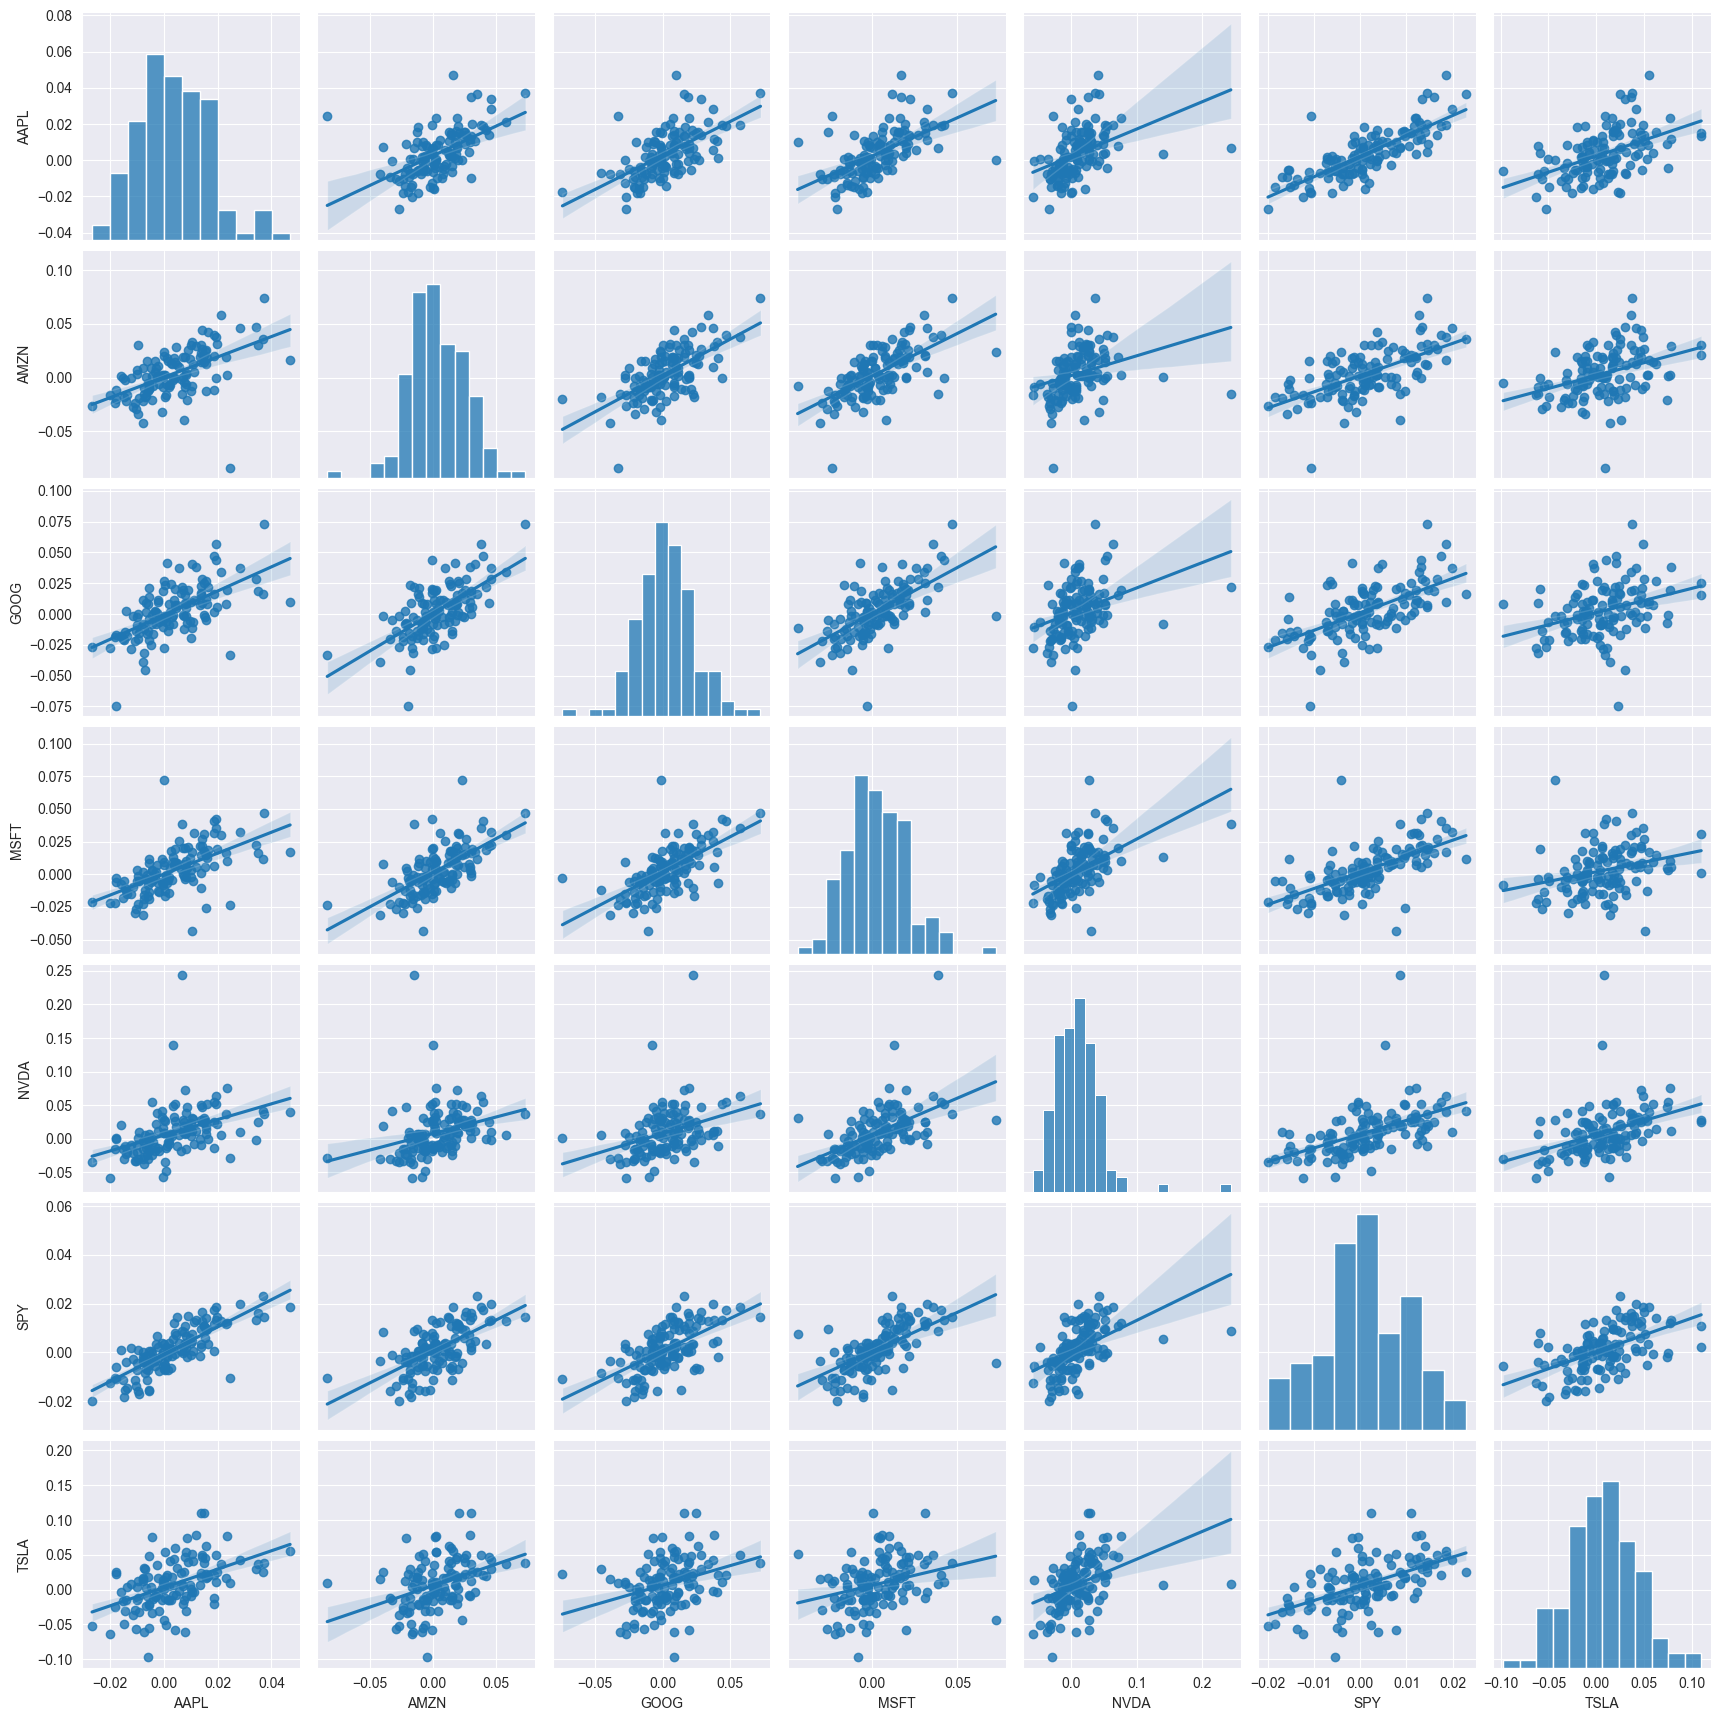

In [101]:
sns.pairplot(returns, kind='reg')

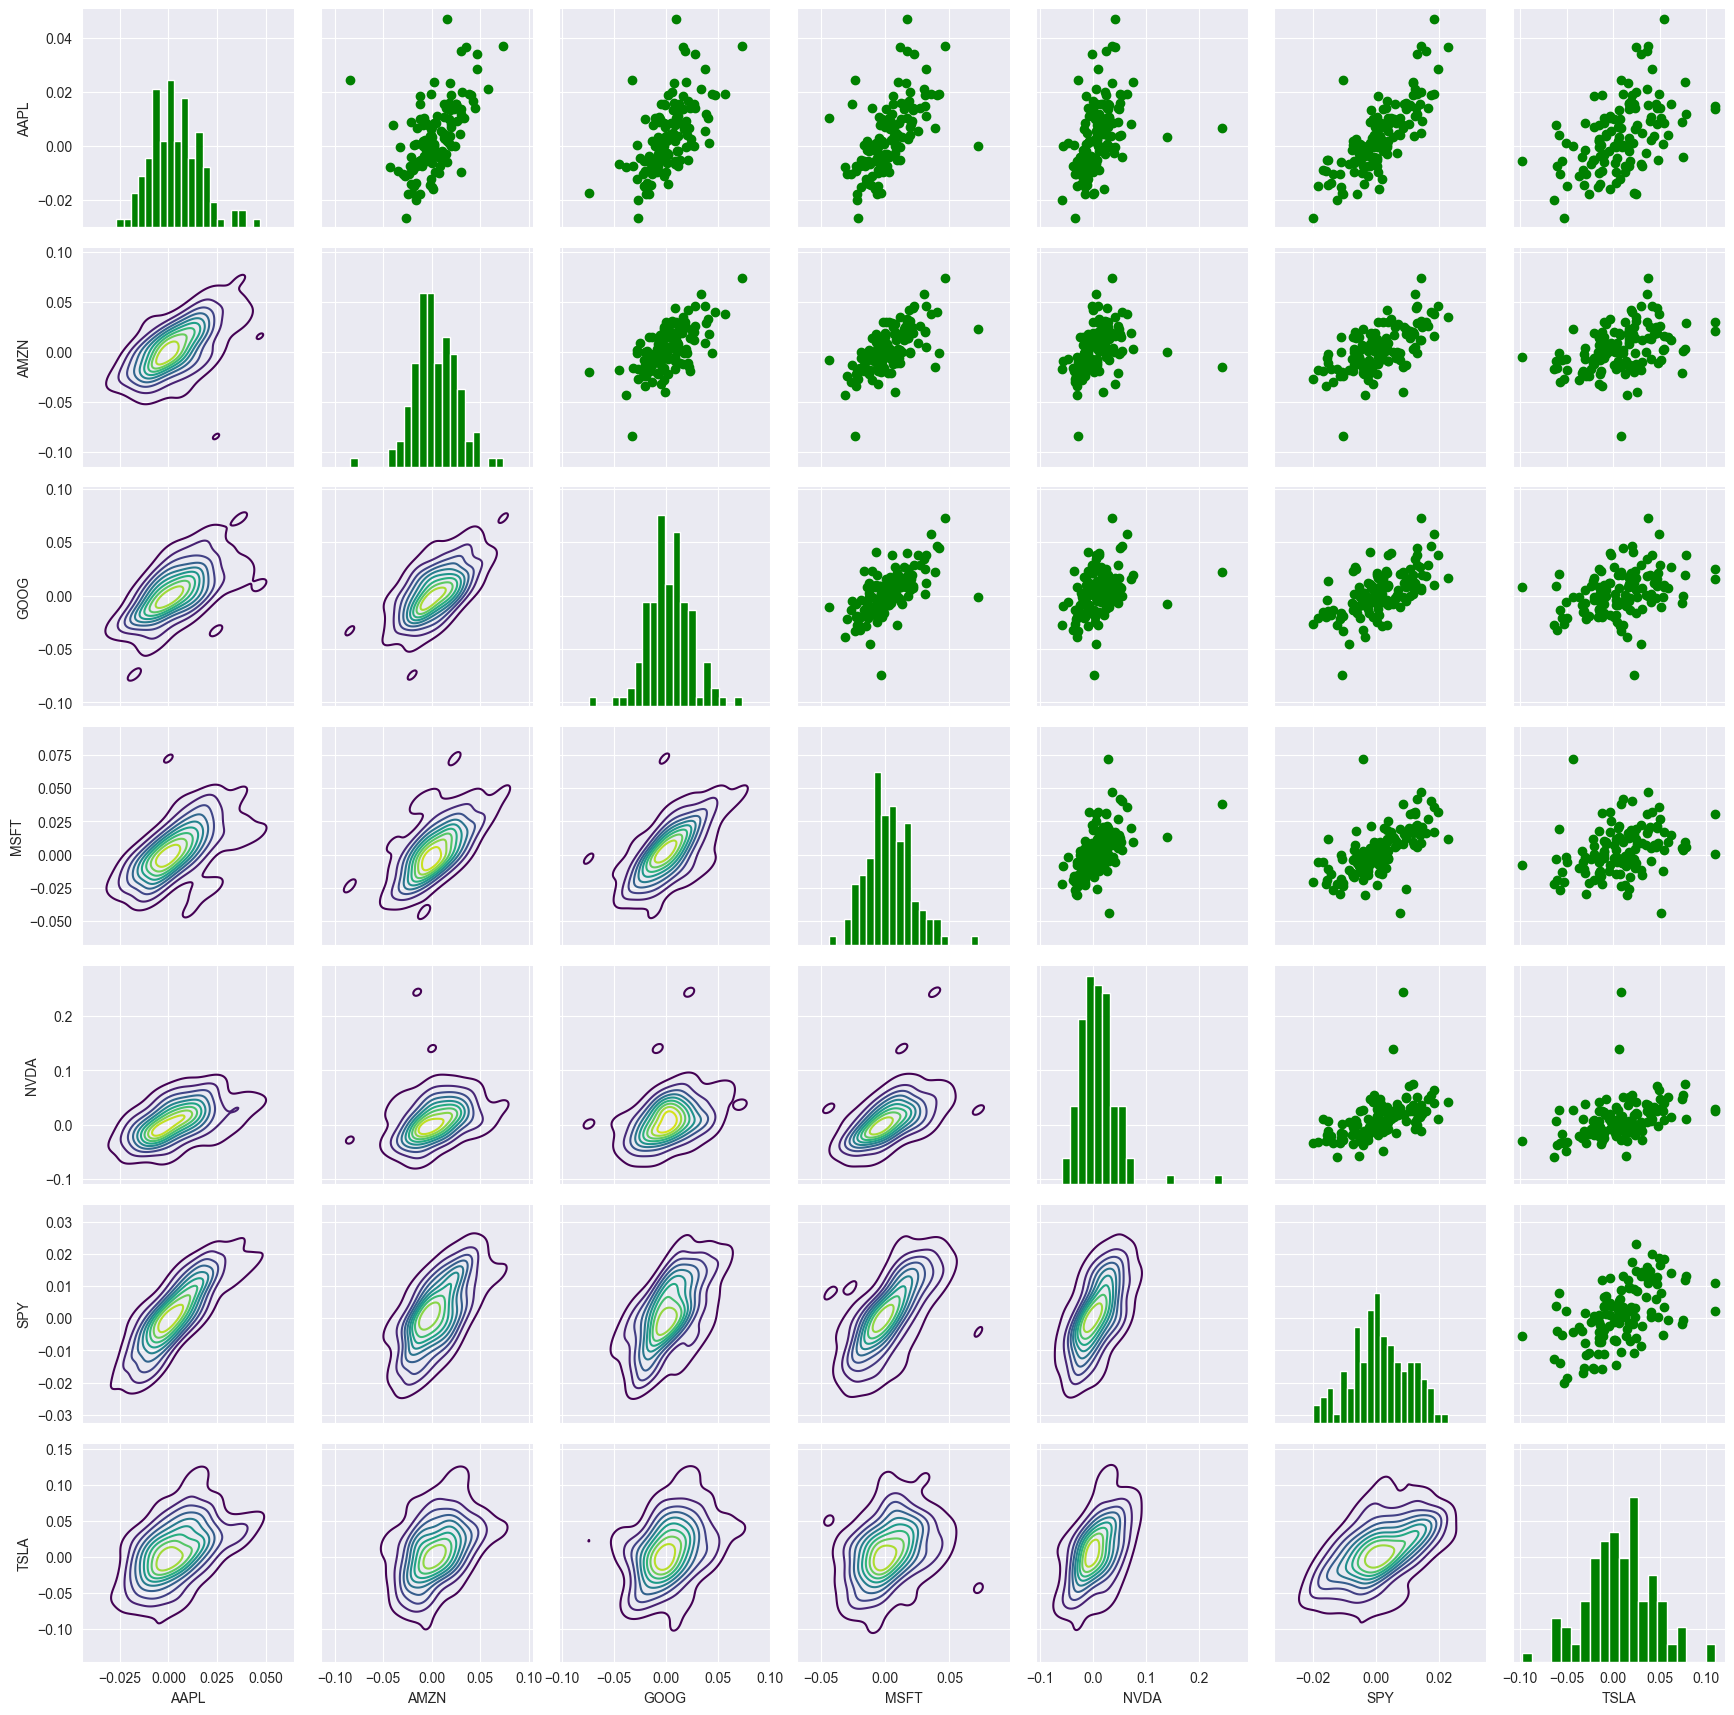

In [102]:
return_fig = sns.PairGrid(returns.dropna())
return_fig.map_upper(plt.scatter, color='green')
return_fig.map_lower(sns.kdeplot, cmap='viridis')
return_fig.map_diag(plt.hist, bins=20, color='green')

In [103]:
np.corrcoef(google['Close'], google['Volume'])

array([[ 1.        , -0.11418172],
       [-0.11418172,  1.        ]])

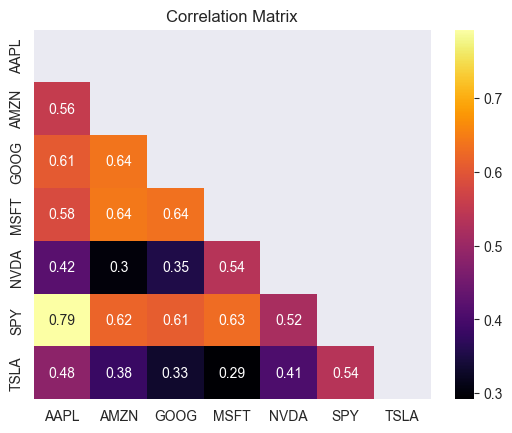

In [104]:
corr = returns.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, cmap='inferno')
plt.title('Correlation Matrix')
plt.show()

### <div id='risk'><center>Risk of the Stocks</center>

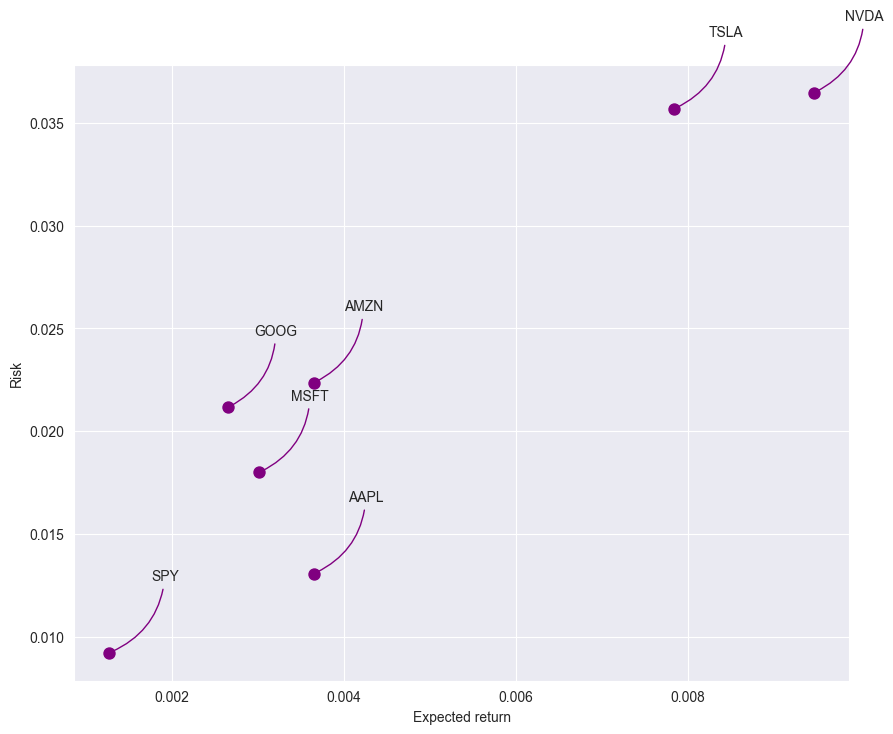

In [105]:
returns = returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(returns.mean(), returns.std(), s=area, color='purple')
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='purple', connectionstyle='arc3,rad=-0.3'))